![](CintillaTecNM-ITD.png)

# Simulación

## Unidad 3. Variables Aleatorias 

### Facilitador: José Gabriel Rodríguez Rivas

<div style="color: blue;">
<h2> Practica 6: Simular La demanda diaria de productos tecnológicos
</div>
 
## Método de la transformada inversa 
    
- El método de la transformada inversa se utiliza para generar variables aleatorias que siguen una distribución específica, **transformando números aleatorios uniformes 𝑈 (0,1) en variables con la distribución deseada.**


## Distribución Binomial 

**Contexto:**

- Supongamos que estamos modelando el número de **clientes que realizan una compra** en una tienda en línea en un día determinado. Sabemos que la tienda recibe en promedio **10 visitantes diarios** y la **probabilidad de que un visitante realice una compra es del 30%**. 
- Queremos generar variables aleatorias que representen el número de clientes que realizan una compra en un día, utilizando la **distribución binomial** y el **método de la transformada inversa**.

### 1. **Distribución Binomial**:
La distribución binomial modela el número de éxitos (en este caso, compras) en un número fijo de ensayos independientes (visitantes), donde cada ensayo tiene dos posibles resultados (compra o no compra) con una probabilidad constante de éxito.

- \( n \): Número de ensayos (número de visitantes diarios), en este caso \( n = 10 \).
- \( p \): Probabilidad de éxito (probabilidad de que un visitante realice una compra), en este caso \( p = 0.30 \).

La **función de probabilidad** de la distribución binomial es:

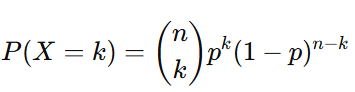

donde:
- $k$ es el número de clientes que realizan una compra (número de éxitos).
- $\binom{n}{k}$ es el coeficiente binomial que representa las combinaciones posibles de **$n$** ensayos en los que se obtienen **$k$** éxitos.

### 2. **Método de la Transformada Inversa**:
El método de la transformada inversa nos permite generar números aleatorios con una distribución específica, como la binomial, a partir de números aleatorios uniformes \( U \sim Uniform(0, 1) \).

#### Pasos para aplicar la transformada inversa con la distribución binomial:

1. **Generar un número aleatorio uniforme **$U$**:
   Generamos un número aleatorio **$U$** entre 0 y 1.

2. **Función de distribución acumulada (FDA)**:
   Calculamos la función de distribución acumulada (FDA) de la distribución binomial, que es la suma de las probabilidades acumuladas **$F(k)$** para valores de $k$ = 0, 1, 2,.....

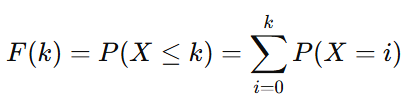

3. **Aplicar la transformada inversa**:
   Para el número aleatorio uniforme $U$, encontramos el valor más pequeño de $k$ tal que $F(k)$ = $U$. Este valor de $k$ es el número de clientes que realizaron una compra en ese día.


### 4. **Explicación de los resultados**:
- En cada simulación (día), se genera un número aleatorio uniforme \( U \), que se transforma mediante el método de la transformada inversa para obtener el número de clientes que realizaron una compra en ese día.
- La gráfica resultante muestra la distribución del número de compras realizadas en 100 simulaciones. La forma de la distribución refleja la probabilidad de que distintos números de clientes realicen compras, con el promedio cercano a \( np = 10 \times 0.30 = 3 \).


*El método de la **transformada inversa** aplicado a la **distribución binomial** permite generar variables aleatorias que simulan el número de éxitos (en este caso, compras) en un conjunto de ensayos independientes. Esta técnica es útil para modelar situaciones donde los eventos tienen una probabilidad constante de éxito y ocurren de forma independiente, como en este caso de compras en una tienda en línea.*
    
    

### Ejemplo aplicado en Python

Número de clientes que realizaron una compra en cada simulación (día):
[2, 4, 3, 1, 2, 2, 5, 2, 2, 1, 4, 0, 2, 4, 3, 2, 1, 3, 6, 4, 1, 6, 4, 0, 5, 4, 3, 3, 1, 2, 1, 2, 3, 4, 4, 2, 3, 4, 4, 2, 3, 1, 5, 2, 3, 2, 4, 5, 3, 3, 2, 3, 3, 6, 5, 3, 5, 4, 3, 4, 3, 1, 2, 2, 1, 2, 3, 4, 2, 0, 2, 6, 2, 5, 1, 5, 1, 5, 2, 2, 4, 2, 1, 6, 8, 5, 4, 2, 4, 3, 0, 0, 2, 3, 5, 2, 2, 1, 1, 1]


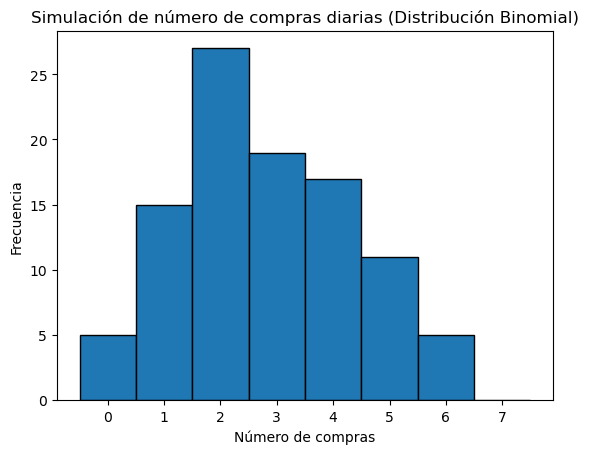

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 10   # Número de visitantes diarios
p = 0.30 # Probabilidad de que un visitante realice una compra

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (días)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de clientes que hicieron una compra
        k += 1

# Generar la cantidad de clientes que realizaron una compra en cada simulación (día)
compras_simuladas = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de clientes que realizaron una compra en cada simulación (día):")
print(compras_simuladas)

# Graficar los resultados
plt.hist(compras_simuladas, bins=np.arange(min(compras_simuladas), max(compras_simuladas) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de número de compras diarias (Distribución Binomial)")
plt.xlabel("Número de compras")
plt.ylabel("Frecuencia")
plt.show()




### Conclusión

El método de la transformada inversa aplicado a la distribución binomial permite generar variables aleatorias que simulan el número de éxitos (en este caso, compras) en un conjunto de ensayos independientes. Esta técnica es útil para modelar situaciones donde los eventos tienen una probabilidad constante de éxito y ocurren de forma independiente, como en este caso de compras en una tienda en línea.